## Predicting the sale price of Bulldozers using Machine Learning

### 1. Problem definition
> predict the price of bulldozer with given characteristics and previous examples of similar bulldozer sold!
### 2, Data
> Kaggle : https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

### 3. Evalution
> The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.
link : https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation

### 4. Features
> Kaggle data dictionary : check out "Data Dictionary.xlsx


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import sklearn

In [137]:
# Importing train and valid set

df = pd.read_csv("Data/TrainAndValid.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [6]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [7]:
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

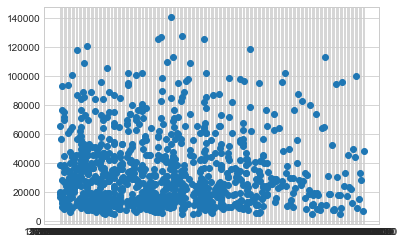

In [8]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

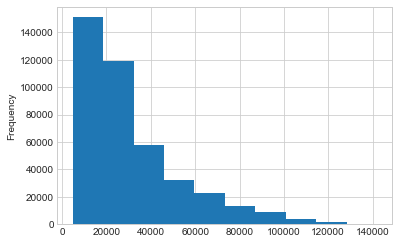

In [9]:
df.SalePrice.plot.hist();

### Parsing dates
* To enrich the time and the date component 
* can be done using `parse_dates` parameter of pandas

In [10]:
# re-importing TrainAndValid with parse_dates

df = pd.read_csv("Data/TrainAndValid.csv", parse_dates=["saledate"])

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.saledate.dtype

dtype('<M8[ns]')

In [13]:
df.saledate

# we have year-month-day

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

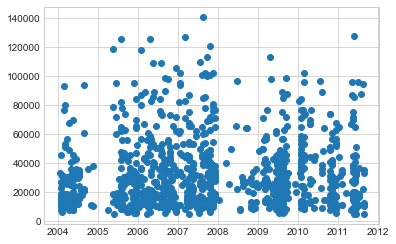

In [14]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

In [16]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [17]:
df.saledate[:20]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

In [18]:
# sort dataframe by sale date
df.sort_values(["saledate"], inplace=True, ascending=True)

In [19]:
df["saledate"].head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [20]:
# Make a copy of original

df_tmp = df.copy()

# here df_tmp is a copy of df
# hence any changes made to df_tmp will not be effecting df

#### Feature Engineering
* Enriching data: Understanding the trend of sales like was the sale more at the start of the year, 
* on which quarter did the sale happen what could be the possible reason be and how does that help us
* in our future sales

In [21]:
df_tmp[:1].saledate.dt.year

205615    1989
Name: saledate, dtype: int64

In [22]:
df_tmp[:1].saledate.dt.day

205615    17
Name: saledate, dtype: int64

In [23]:
df_tmp[:1].saledate.dt.month

205615    1
Name: saledate, dtype: int64

In [24]:
df_tmp[:1].saledate

205615   1989-01-17
Name: saledate, dtype: datetime64[ns]

In [25]:
# Enriching
df_tmp["saleYear"] = df_tmp["saledate"].dt.year
df_tmp["saleMonth"] = df_tmp["saledate"].dt.month
df_tmp["saleDay"] = df_tmp["saledate"].dt.day
df_tmp["saleDayOfWeek"] = df_tmp["saledate"].dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp["saledate"].dt.dayofyear

In [26]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [27]:
# Now we have saleDayOfYear saleDayOfWeek saleDay saleMonth
# So lets drop saledate column
# these are called DateTime features

df_tmp = df_tmp.drop("saledate", axis = 1)

In [28]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


<AxesSubplot:>

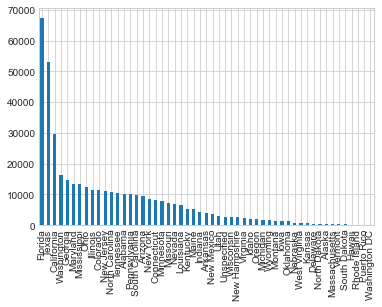

In [29]:
 # checking different columns
df_tmp.state.value_counts().plot.bar()

### Modelling

In [30]:
#machine learning model

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs = -1,
                             random_state = 42)

# random_state works like np.random.seed(42)

#### Convert string to categories
  link https://pandas.pydata.org/pandas-docs/version/1.4/reference/general_utility_functions.html

In [31]:
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

True

In [32]:
# Find the columns which contains strings
# for converting it to numericals

for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [33]:
# lets change strings to categories

for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [34]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [36]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [37]:
df_tmp.Tip_Control.unique()

[NaN, 'Sideshift & Tip', 'None or Unspecified', 'Tip']
Categories (3, object): ['None or Unspecified' < 'Sideshift & Tip' < 'Tip']

In [38]:
df_tmp.Tip_Control.cat.categories

Index(['None or Unspecified', 'Sideshift & Tip', 'Tip'], dtype='object')

In [39]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [40]:
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [41]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [42]:
# checking missing values
df_tmp.isnull().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

**Save preprocessed data**


In [43]:
# Export current tmp dataframe
df_tmp.to_csv("Data/train_tmp.csv", index = False)

In [44]:
# import preprocessed data
df_tmp = pd.read_csv("Data/train_tmp.csv",
                    low_memory = False)

In [45]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [46]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Fill missing values

###### Numeric missing values

In [47]:
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [48]:
# check for which numeric columns have null values

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [49]:
# Fill numeric rows with the median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing
            df_tmp[label + "_is_missing"] = pd.isnull(content)
            # filling missing numeric value with the median
            df_tmp[label] = content.fillna(content.median())

In [53]:
# because median is more roboust than mean
# median gives more precise avg when there one or few higher values compared to others
# mean produced average is gona be significantly effected by that one or few values

In [50]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
else:
    print("nothing!")

nothing!


In [51]:
# lets check how many examples were missing
df_tmp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [52]:
 # lets deal with other missing values 
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

In [53]:
# Filling categoricak variables into numbers
# check for columns which arent numerical

for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)
    
            

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [54]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

In [55]:
pd.Categorical(df_tmp["state"]).dtype

CategoricalDtype(categories=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
                  'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
                  'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland',
                  'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
                  'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
                  'New Jersey', 'New Mexico', 'New York', 'North Carolina',
                  'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
                  'Puerto Rico', 'Rhode Island', 'South Carolina',
                  'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah',
                  'Vermont', 'Virginia', 'Washington', 'Washington DC',
                  'West Virginia', 'Wisconsin', 'Wyoming'],
, ordered=False)

In [56]:
pd.Categorical(df_tmp["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [57]:
pd.Categorical(df_tmp["state"]).codes + 1

array([44,  9,  9, ...,  5,  5,  5], dtype=int8)

In [58]:
# turn categorical variables to numbers and fill missing

for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # turn categories into numbers and +1
        df_tmp[label] = pd.Categorical(content).codes+1
        
        # +1 because pandas by default assigns -1 if the data is missing 
        # lets keep to '0' hence +1

In [59]:
pd.Categorical(df_tmp["UsageBand"]).codes

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [60]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [61]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(5), int64(10), int8(39)
memory usage: 78.3 MB


In [62]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


#### Modeling

In [63]:
len(df_tmp)

412698

In [64]:
%%time
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)
model.fit(df_tmp.drop("SalePrice", axis = 1), df_tmp.SalePrice)

KeyboardInterrupt: 

In [71]:
model.score(df_tmp.drop("SalePrice", axis = 1), df_tmp.SalePrice)

0.9875516841918182

**But this is not valid because I trained and tested on the same data sets**

In [72]:
# now 
# spitting of data according to the kaggle any data 2012 is considered to be valid data 
# ie., test data for now though there is test.csv which can be used to test on the later part.

#### Splitting data into train/validation sets

In [73]:
df_tmp.saleYear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [74]:
df_tmp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [181]:
# split data into training and validation
df_tmp_valid = df_tmp[df_tmp.saleYear == 2012]
df_tmp_train = df_tmp[df_tmp.saleYear != 2012]

In [182]:
len(df_tmp_valid), len(df_tmp_train)

(11573, 401125)

In [183]:
# split data into X and y
X_train, y_train = df_tmp_train.drop("SalePrice", axis = 1), df_tmp_train.SalePrice
X_valid, y_valid = df_tmp_valid.drop("SalePrice", axis = 1), df_tmp_valid.SalePrice

### arranging in order

In [184]:
cols_X_train = X_train.columns.to_list()
cols_X_train.sort()
X_train = X_train[cols_X_train]
#cols_y_train = y_train.columns.to_list()
cols_X_valid = X_valid.columns.to_list()
cols_X_train.sort()
X_valid = X_valid[cols_X_valid]
#cols_y_valid = y_valid.columns.to_list()




cols_X_valid = X_valid.columns.to_list()
cols_X_valid.sort()

X_valid = X_valid[cols_X_valid]

In [177]:
X_train.columns.to_list()

['Backhoe_Mounting',
 'Backhoe_Mounting_is_missing',
 'Blade_Extension',
 'Blade_Extension_is_missing',
 'Blade_Type',
 'Blade_Type_is_missing',
 'Blade_Width',
 'Blade_Width_is_missing',
 'Coupler',
 'Coupler_System',
 'Coupler_System_is_missing',
 'Coupler_is_missing',
 'Differential_Type',
 'Differential_Type_is_missing',
 'Drive_System',
 'Drive_System_is_missing',
 'Enclosure',
 'Enclosure_Type',
 'Enclosure_Type_is_missing',
 'Enclosure_is_missing',
 'Engine_Horsepower',
 'Engine_Horsepower_is_missing',
 'Forks',
 'Forks_is_missing',
 'Grouser_Tracks',
 'Grouser_Tracks_is_missing',
 'Grouser_Type',
 'Grouser_Type_is_missing',
 'Hydraulics',
 'Hydraulics_Flow',
 'Hydraulics_Flow_is_missing',
 'Hydraulics_is_missing',
 'MachineHoursCurrentMeter',
 'MachineHoursCurrentMeter_is_missing',
 'MachineID',
 'ModelID',
 'Pad_Type',
 'Pad_Type_is_missing',
 'Pattern_Changer',
 'Pattern_Changer_is_missing',
 'ProductGroup',
 'ProductGroupDesc',
 'ProductGroupDesc_is_missing',
 'ProductGroup_

In [173]:
X_valid.columns.to_list()

['SalesID',
 'MachineID',
 'ModelID',
 'datasource',
 'auctioneerID',
 'YearMade',
 'MachineHoursCurrentMeter',
 'UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls',
 'saleYear',
 'saleMonth',
 'saleDay',
 'saleDayOfWeek',
 'saleDayOfYear',
 'auctioneerID_is_missing',
 'MachineHoursCurrentMeter_is_missing',

In [180]:
len(X_train.columns), len(X_valid.columns)

(102, 102)

In [174]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Classification metrics                   vs                   Regression metrics
* Accuracy                                                   * R^2
* Precision                                                  * Mean absolute error                      * Recall                                                     * Mean squared error
* F1                                                         * Root mean squared error

### Building an evaluation function


In [ ]:
# Which regression metric should you use?

"""* R2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

* MAE gives a better indication of how far off each of your model's predictions are on average.

* As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).

* Pay more attention to MAE: When being 10,000 off is twice as bad as being $5,000 off.

* Pay more attention to MSE: When being 10,000 off is more than twice as bad as being $5,000 off."""

In [186]:
# mean_absolute_error is like having 10/- off like doesnt matter that much
# but mean_square_log_error is dealing with ratio's its something like 10% off which is a matter 
# to be considered when compared to 10/-

from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

# Create evaluation function (uses RMSLE refer problem definition
def rmsle(y_test, y_preds):
    '''Root mean squared log error between predictions and truth labels.'''
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# create a function to evaluate models

def show_scores(model):
    train_preds = model.predict(X_train)
    valid_preds = model.predict(X_valid)
    # if our model is produces valid_preds > train_preds then our model is overfitted!!
    
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
             "Valid MAE: mean": mean_absolute_error(y_valid, valid_preds),
             "Training RMSLE": rmsle(y_train, train_preds),
             "Valid RMSLE": rmsle(y_valid, valid_preds),
             "Training R^2": r2_score(y_train, train_preds),
             "Valid R^2": r2_score(y_valid, valid_preds)}
    
    return scores

### Reducing data/ subset testing/ hypertuning
**cause time consuming**

In [ ]:
# change max_samples values

# the model works on 10,000 samples of data
# dafault n_estimator = 1000
# which means 10000 * 100 times the model tries to find pattern
# which would be quicker compared to 40,1125 * 100
# (X_train.shape[0] * 100)/1000000 = 401125/1000000 ~ 40.11
# ie., it will take 40x times less time the previous model

In [96]:
X_train.shape[0] 

401125

In [97]:
(X_train.shape[0] * 100)/1000000

40.1125

In [153]:
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                            max_samples=10000)

In [187]:
%%time
# cutting rows lets check time taken
model.fit(X_train, y_train)

Wall time: 10.1 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [233]:
show_scores(model)
# valid > training which means we are not overfitting  

{'Training MAE': 5561.456143197257,
 'Valid MAE: mean': 7163.866153979089,
 'Training RMSLE': 0.2577074243784178,
 'Valid RMSLE': 0.2928174527391501,
 'Training R^2': 0.8607362613712901,
 'Valid R^2': 0.8327390596974262}

#### Hyperparameter tuning with RandomizedSearchCV

In [118]:
%%time

from sklearn.model_selection import RandomizedSearchCV

rf_grid = {
    "n_estimators" : np.arange(10,100,10),
    "max_depth" : [None, 3, 5, 10],
    "min_samples_split": np.arange(2,20,2),
    "min_samples_leaf" : np.arange(1,20,2),
    "max_features" : [0.5, 1,"sqrt", "auto"],
    "max_samples" : [10000]
}


# model creation with RandomizedSearchCV
reg = RandomForestRegressor(n_jobs=-1, random_state=42)
rs_model = RandomizedSearchCV(reg,
                              param_distributions=rf_grid,
                              n_iter = 100, #
                              cv = 5,
                              random_state=42)
rs_model.fit(X_train, y_train)

C:\Users\revan\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\revan\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\revan\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

C:\Users\revan\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\revan\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\revan\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

C:\Users\revan\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\revan\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\revan\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

C:\Users\revan\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\revan\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\revan\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

C:\Users\revan\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\revan\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\revan\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

C:\Users\revan\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\revan\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\revan\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

Wall time: 25min 15s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   random_state=42)

In [114]:
rs_model.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'squared_error',
 'estimator__max_depth': None,
 'estimator__max_features': 1.0,
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': -1,
 'estimator__oob_score': False,
 'estimator__random_state': 42,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestRegressor(n_jobs=-1, random_state=42),
 'n_iter': 5,
 'n_jobs': None,
 'param_distributions': {'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
  'max_depth': [None, 3, 5, 10],
  'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
  'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
  'max_features': [0.5, 1, 'sqrt', 'aut

In [125]:
rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [123]:
show_scores(rs_model)

{'Training MAE': 5628.400545029605,
 'Valid MAE: mean': 7292.436088308995,
 'Training RMSLE': 0.2600431217795912,
 'Valid RMSLE': 0.2985693306527952,
 'Training R^2': 0.8571263295435694,
 'Valid R^2': 0.826769416919567}

In [189]:
%%time

# Most ideal hyperparamters
ideal_model = RandomForestRegressor(n_estimators = 40,
                                    n_jobs=-1,
                                    min_samples_split = 2,
                                    min_samples_leaf = 1,
                                    max_samples = None,
                                    max_features = 'auto',
                                    max_depth = None,
                                   random_state = 42)

ideal_model.fit(X_train, y_train)

C:\Users\revan\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Wall time: 2min 17s


RandomForestRegressor(max_features='auto', n_estimators=40, n_jobs=-1,
                      random_state=42)

In [165]:
X_train.columns

Index(['Backhoe_Mounting', 'Backhoe_Mounting_is_missing', 'Blade_Extension',
       'Blade_Extension_is_missing', 'Blade_Type', 'Blade_Type_is_missing',
       'Blade_Width', 'Blade_Width_is_missing', 'Coupler', 'Coupler_System',
       ...
       'fiProductClassDesc_is_missing', 'fiSecondaryDesc',
       'fiSecondaryDesc_is_missing', 'saleDay', 'saleDayOfWeek',
       'saleDayOfYear', 'saleMonth', 'saleYear', 'state', 'state_is_missing'],
      dtype='object', length=102)

In [190]:
train_preds =  ideal_model.predict(X_train)

In [232]:
valid_preds = ideal_model.predict(X_valid)

In [231]:
show_scores(ideal_model)

{'Training MAE': 1620.1749722031786,
 'Valid MAE: mean': 6169.010306316427,
 'Training RMSLE': 0.08694776451467735,
 'Valid RMSLE': 0.25661948174323856,
 'Training R^2': 0.9865150194187802,
 'Valid R^2': 0.8707633839843862}

{'Training MAE': 1619.9329164848862,
 'Valid MAE: mean': 6168.544411561393,
 'Training RMSLE': 0.08689256433784497,
 'Valid RMSLE': 0.25734439067842657,
 'Training R^2': 0.9865331998046794,
 'Valid R^2': 0.8706812347155388}

###### Our 'Valid RMSLE': 0.25734439067842657

### Making predictions

In [208]:
# importing test.csv

df_test = pd.read_csv("Data/Test.csv",
                     low_memory = False,
                     parse_dates=["saledate"])

In [209]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [234]:
test_preds = ideal_model.predict(df_test)

In [140]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [141]:
df_test.dtypes

SalesID                              int64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                         int64
YearMade                             int64
MachineHoursCurrentMeter           float64
UsageBand                           object
saledate                    datetime64[ns]
fiModelDesc                         object
fiBaseModel                         object
fiSecondaryDesc                     object
fiModelSeries                       object
fiModelDescriptor                   object
ProductSize                         object
fiProductClassDesc                  object
state                               object
ProductGroup                        object
ProductGroupDesc                    object
Drive_System                        object
Enclosure                           object
Forks                               object
Pad_Type                            object
Ride_Contro

#### Preprocessing test data

In [210]:
# lets write a function for preprocessing data sets

def preprocess_data(df):
    '''
    performs transformation on df and returns transformed df
    '''
    # Enriching
    df["saleYear"] = df["saledate"].dt.year
    df["saleMonth"] = df["saledate"].dt.month
    df["saleDay"] = df["saledate"].dt.day
    df["saleDayOfWeek"] = df["saledate"].dt.dayofweek
    df["saleDayOfYear"] = df["saledate"].dt.dayofyear
    
    df = df.drop("saledate", axis = 1)
    
    # Fill numric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing
                df[label + "_is_missing"] = pd.isnull(content)
            # filling missing numeric value with the median
                df[label] = content.fillna(content.median())
            
            
    # Filled categorical missing data and turned into categorical numbers
        if not pd.api.types.is_numeric_dtype(content):
               df[label+'_is_missing'] = pd.isnull(content)
               df[label] = pd.Categorical(content).codes + 1  #pandas defaults category to -1
    
    return df

In [211]:
# process test data
df_test = preprocess_data(df_test)


In [212]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [213]:
X_train.head()

,Backhoe_Mounting,Backhoe_Mounting_is_missing,Blade_Extension,Blade_Extension_is_missing,Blade_Type,Blade_Type_is_missing,Blade_Width,Blade_Width_is_missing,Coupler,Coupler_System,...,fiProductClassDesc_is_missing,fiSecondaryDesc,fiSecondaryDesc_is_missing,saleDay,saleDayOfWeek,saleDayOfYear,saleMonth,saleYear,state,state_is_missing
0,1,False,0,True,8,False,0,True,0,0,...,False,0,True,17,1,17,1,1989,44,False
1,0,True,0,True,0,True,0,True,3,0,...,False,0,True,31,1,31,1,1989,9,False
2,1,False,0,True,8,False,0,True,0,0,...,False,59,False,31,1,31,1,1989,9,False
3,0,True,0,True,0,True,0,True,3,0,...,False,0,True,31,1,31,1,1989,9,False
4,1,False,0,True,6,False,0,True,0,0,...,False,21,False,31,1,31,1,1989,9,False


In [230]:
# make predication
test_preds = ideal_model.predict(df_test)

In [214]:
# lets see how many columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [215]:
# adding the missing column
df_test['auctioneerID_is_missing'] = False

# because 'auctioneerID_is_missing' has no missing values 
# all filled in the above preproceessing

In [216]:
df_test.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Stick_Length_is_missing', 'Thumb_is_missing',
       'Pattern_Changer_is_missing', 'Grouser_Type_is_missing',
       'Backhoe_Mounting_is_missing', 'Blade_Type_is_missing',
       'Travel_Controls_is_missing', 'Differential_Type_is_missing',
       'Steering_Controls_is_missing', 'auctioneerID_is_missing'],
      dtype='object', length=102)

In [217]:
cols_df_test = df_test.columns.to_list()
cols_df_test.sort()

df_test = df_test[cols_df_test]

In [218]:
X_train.head()

,Backhoe_Mounting,Backhoe_Mounting_is_missing,Blade_Extension,Blade_Extension_is_missing,Blade_Type,Blade_Type_is_missing,Blade_Width,Blade_Width_is_missing,Coupler,Coupler_System,...,fiProductClassDesc_is_missing,fiSecondaryDesc,fiSecondaryDesc_is_missing,saleDay,saleDayOfWeek,saleDayOfYear,saleMonth,saleYear,state,state_is_missing
0,1,False,0,True,8,False,0,True,0,0,...,False,0,True,17,1,17,1,1989,44,False
1,0,True,0,True,0,True,0,True,3,0,...,False,0,True,31,1,31,1,1989,9,False
2,1,False,0,True,8,False,0,True,0,0,...,False,59,False,31,1,31,1,1989,9,False
3,0,True,0,True,0,True,0,True,3,0,...,False,0,True,31,1,31,1,1989,9,False
4,1,False,0,True,6,False,0,True,0,0,...,False,21,False,31,1,31,1,1989,9,False


In [219]:
df_test.head()

,Backhoe_Mounting,Backhoe_Mounting_is_missing,Blade_Extension,Blade_Extension_is_missing,Blade_Type,Blade_Type_is_missing,Blade_Width,Blade_Width_is_missing,Coupler,Coupler_System,...,fiProductClassDesc_is_missing,fiSecondaryDesc,fiSecondaryDesc_is_missing,saleDay,saleDayOfWeek,saleDayOfYear,saleMonth,saleYear,state,state_is_missing
0,0,True,0,True,0,True,0,True,0,0,...,False,25,False,3,3,124,5,2012,51,False
1,0,True,0,True,0,True,0,True,3,0,...,False,0,True,10,3,131,5,2012,46,False
2,0,True,0,True,0,True,0,True,3,0,...,False,9,False,10,3,131,5,2012,29,False
3,0,True,0,True,0,True,0,True,3,0,...,False,13,False,10,3,131,5,2012,29,False
4,1,False,0,True,4,False,0,True,0,0,...,False,33,False,10,3,131,5,2012,8,False


**Finally test and train data sets features match's**

In [221]:
test_preds = ideal_model.predict(df_test)

In [222]:
test_preds

array([20362.5 , 19086.25, 48187.5 , ..., 11456.25, 17400.  , 32000.  ])

**we cant evaluate the test_preds as we dont know the truth labels**

# Predicting at 
**From our previous model evaluations!**

* RMSLE : 0.2566

* 87% : r^2 

cols_X_valid = X_valid.columns.to_list()
cols_X_valid.sort()

X_valid = X_valid[cols_X_valid]

valid_preds = ideal_model.predict(X_valid)

## Formatting the predictions to might the format constraint

In [236]:
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test["SalesID"]
df_preds['SalesPrice'] = test_preds

In [237]:
df_preds

,SalesID,SalesPrice
0,1227829,20362.50
1,1227844,19086.25
2,1227847,48187.50
3,1227848,85400.00
4,1227863,50840.00
...,...,...
12452,6643171,53500.00
12453,6643173,11162.50
12454,6643184,11456.25
12455,6643186,17400.00


In [238]:
# Exporting prediction data
df_preds.to_csv("Predictions/test_predicitons.csv", index=False)

## Feature Importance
* attributes and their importance

In [240]:
ideal_model.feature_importances_

array([2.61770375e-04, 2.44745655e-04, 3.38283261e-05, 8.10676011e-06,
       1.75120670e-03, 1.28537085e-04, 7.88363860e-03, 3.85894871e-04,
       9.90065711e-04, 1.57420592e-02, 1.42893942e-02, 1.56010722e-04,
       1.75973864e-04, 5.78628701e-05, 1.70211805e-03, 1.73772450e-05,
       8.72878216e-03, 2.11172713e-04, 4.09359258e-04, 4.34305117e-06,
       4.41012877e-04, 3.85057411e-04, 3.97379557e-04, 7.49049815e-05,
       1.05319785e-05, 3.20674161e-06, 4.78881801e-04, 3.02047140e-05,
       3.34378903e-03, 4.81109467e-06, 3.31495325e-07, 1.60970774e-03,
       3.24538169e-03, 4.93040740e-04, 1.63601284e-02, 3.26893888e-02,
       4.14201548e-05, 3.45383547e-06, 2.50240408e-04, 4.05112919e-05,
       2.31210280e-04, 2.21615865e-04, 0.00000000e+00, 0.00000000e+00,
       2.27679572e-01, 2.39629342e-03, 2.27068154e-03, 1.04257342e-05,
       5.51414694e-04, 6.47015612e-05, 2.26477172e-03, 8.40304834e-05,
       4.98004705e-02, 3.56942653e-03, 3.86533217e-03, 2.00324255e-04,
      

In [241]:
len(ideal_model.feature_importances_)

102

In [243]:
len(X_train.columns)

102

In [244]:
X_train

,Backhoe_Mounting,Backhoe_Mounting_is_missing,Blade_Extension,Blade_Extension_is_missing,Blade_Type,Blade_Type_is_missing,Blade_Width,Blade_Width_is_missing,Coupler,Coupler_System,...,fiProductClassDesc_is_missing,fiSecondaryDesc,fiSecondaryDesc_is_missing,saleDay,saleDayOfWeek,saleDayOfYear,saleMonth,saleYear,state,state_is_missing
0,1,False,0,True,8,False,0,True,0,0,...,False,0,True,17,1,17,1,1989,44,False
1,0,True,0,True,0,True,0,True,3,0,...,False,0,True,31,1,31,1,1989,9,False
2,1,False,0,True,8,False,0,True,0,0,...,False,59,False,31,1,31,1,1989,9,False
3,0,True,0,True,0,True,0,True,3,0,...,False,0,True,31,1,31,1,1989,9,False
4,1,False,0,True,6,False,0,True,0,0,...,False,21,False,31,1,31,1,1989,9,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401120,0,True,0,True,0,True,0,True,2,0,...,False,21,False,30,4,364,12,2011,32,False
401121,0,True,0,True,0,True,0,True,3,1,...,False,0,True,30,4,364,12,2011,32,False
401122,0,True,0,True,0,True,0,True,3,1,...,False,0,True,30,4,364,12,2011,32,False
401123,0,True,0,True,0,True,0,True,0,0,...,False,0,True,30,4,364,12,2011,32,False


In [249]:
# lets Visualize feature importance

def plot_feature_importance(columns, importances, n=20):
    df = (pd.DataFrame({"features":columns,
                      "feature_importances":importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    ## We created a dataframe with Columns: features and feature_importance
    ## then we sorted inaccordance with feature_importance in descending order
    ## and reseted the index
    
    # plot the dataframe
    
    fig, ax = plt.subplots(figsize=(10,10))
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature_importance")
    ax.invert_yaxis() # for showing in descending order

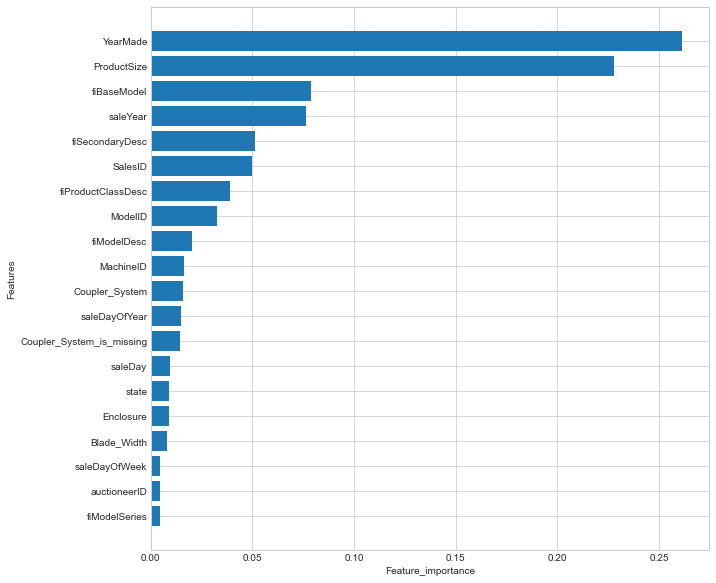

In [250]:
plot_feature_importance(X_train.columns, ideal_model.feature_importances_)

In [253]:
df["ProductSize"].value_counts()

Medium            64342
Large / Medium    51297
Small             27057
Mini              25721
Large             21396
Compact            6280
Name: ProductSize, dtype: int64

In [254]:
df["Enclosure"].value_counts()

OROPS                  177971
EROPS                  141769
EROPS w AC              92601
EROPS AC                   18
NO ROPS                     3
None or Unspecified         2
Name: Enclosure, dtype: int64

In [256]:
# trying catboost

from catboost import CatBoostRegressor
# Initialize data
train_labels = X_train.columns.to_list()# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=2,
                          learning_rate=1,
                          depth=2)
# Fit model
model.fit(X_train, y_train)
# Get predictions
preds = model.predict(X_valid)

0:	learn: 20549.0862166	total: 40.4ms	remaining: 40.4ms
1:	learn: 19024.5792603	total: 70.1ms	remaining: 0us


In [259]:
show_scores(model)

{'Training MAE': 13865.560580954043,
 'Valid MAE: mean': 15403.802424975998,
 'Training RMSLE': 0.5944555145974784,
 'Valid RMSLE': 0.5945580119106794,
 'Training R^2': 0.31800186551848697,
 'Valid R^2': 0.33228031186922813}

# Finally, We manged a Logisitic model to predict the heart-disease of a patient with their Medical report data
* with RMSLE : 0.2566
* with an accuracy of 87%
* with the best parameter 

{'n_estimators': 40,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}